# Aplicacões da tranformada de Fourier

## Aplicando a transformada de Furier em um sinal sonoro:

### Primeiro, vamos carregar um sinal sonoro:

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import wavfile
from IPython.display import Audio

# Carrega o arquivo de áudio
# os audios foram baixados daqui: https://datashare.ed.ac.uk/handle/10283/2791
sample_rate, signal = wavfile.read('data/p232_003.wav')

Audio(signal, rate=sample_rate)

### Agora vamos calcular a transformada de fourier sobre o sinal limpo:

In [69]:
# Calcula a transformada de Fourier
Xf_mag = np.abs(np.fft.fft(signal))
freqs = np.fft.fftfreq(len(Xf_mag), d=1.0/sample_rate)

### ... e vamos plotar o sinal limpo e seu espectro de frequencia após a transformada de Fourier: 

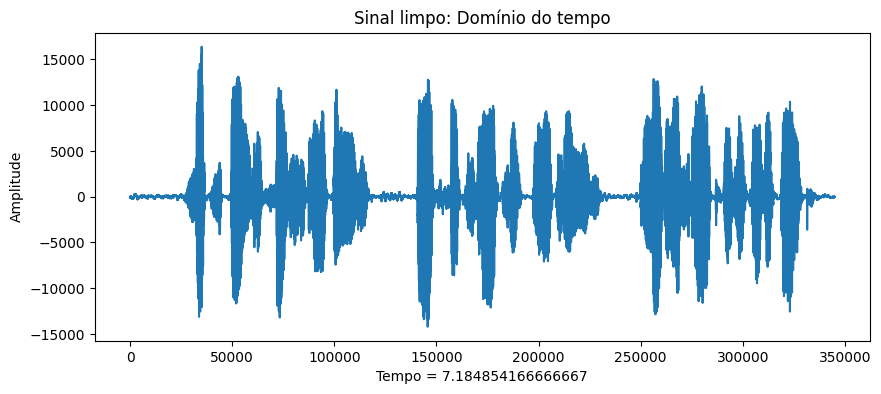

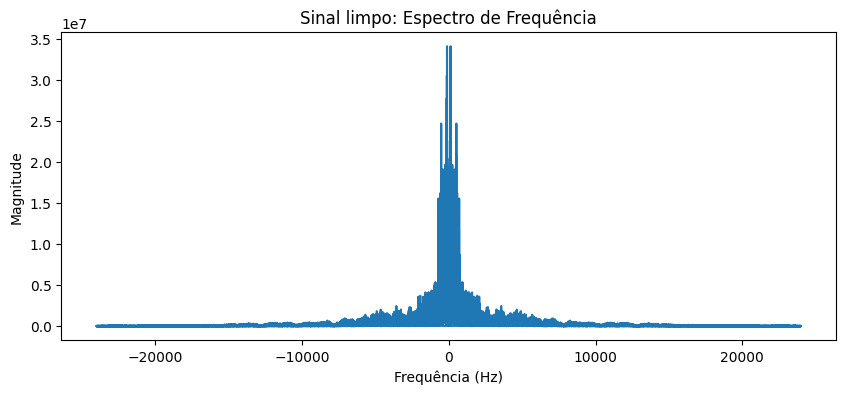

In [70]:
tempo = len(signal)/sample_rate

plt.figure(figsize=(10, 4))
plt.plot( signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal limpo: Domínio do tempo')

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Sinal limpo: Espectro de Frequência')
plt.show()


### Agora vamos carregar o mesmo sinal, porém com ruído (conversa ao fundo)

In [72]:
# os audios foram baixados daqui: https://datashare.ed.ac.uk/handle/10283/2791
sample_rate, n_signal = wavfile.read('data/p232_003_n.wav')

Audio(n_signal, rate=sample_rate)


### VeVejamos a a diferenca entre estes sinais no domínio do tempo:

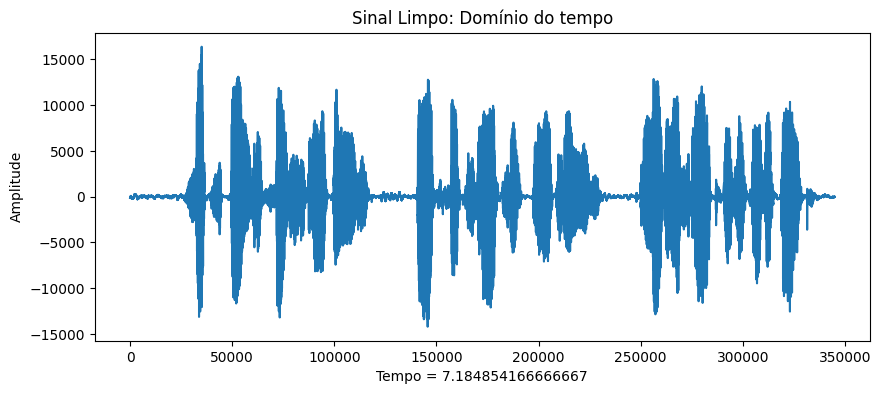

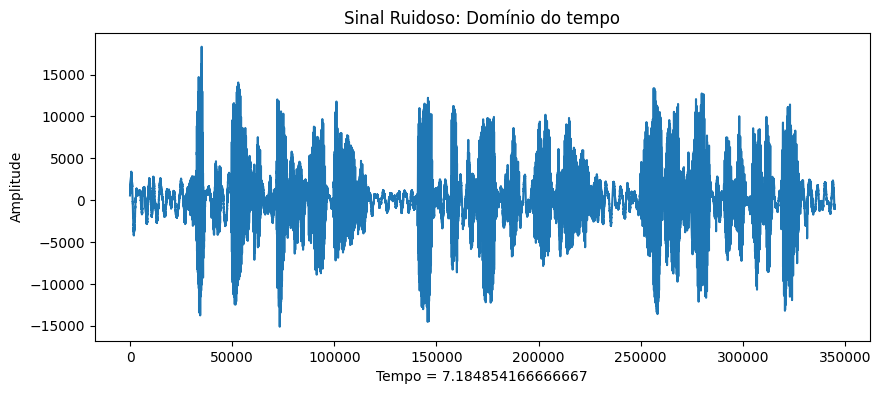

In [73]:
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Limpo: Domínio do tempo')

plt.figure(figsize=(10, 4))
plt.plot(n_signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Ruidoso: Domínio do tempo')

plt.show()

### ... e vamos plotar o sinal ruidoso e seu espectro de frequencia após a transformada de Fourier: 

In [74]:
# Calcula a transformada de Fourier
Xf_mag_n = np.abs(np.fft.fft(n_signal))
freqs_n = np.fft.fftfreq(len(Xf_mag_n), d=1.0/sample_rate)

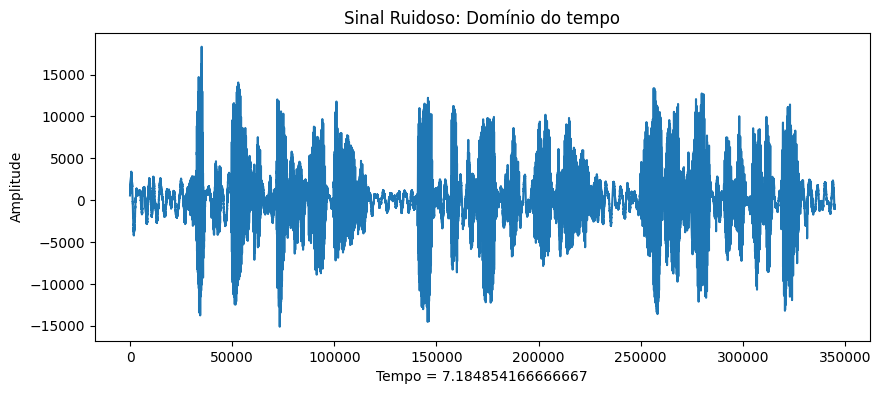

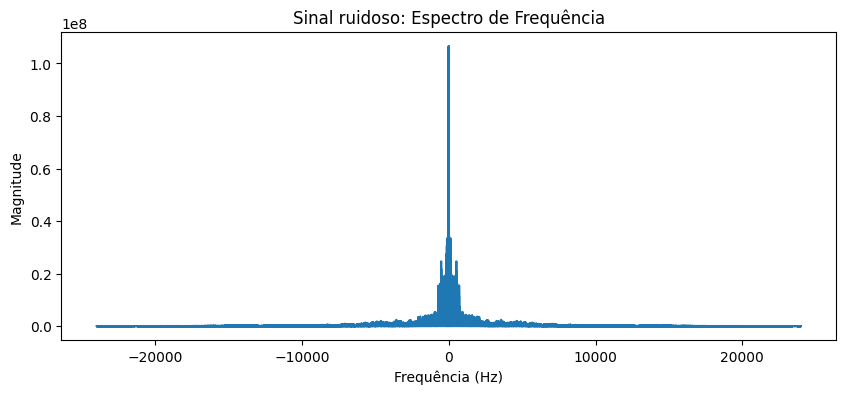

In [75]:
plt.figure(figsize=(10, 4))
plt.plot(n_signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Ruidoso: Domínio do tempo')


#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs_n, Xf_mag_n)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Sinal ruidoso: Espectro de Frequência')
plt.show()

### Aqui plotamos o sinal limpo e o sinal ruidoso no domínio de frequencia

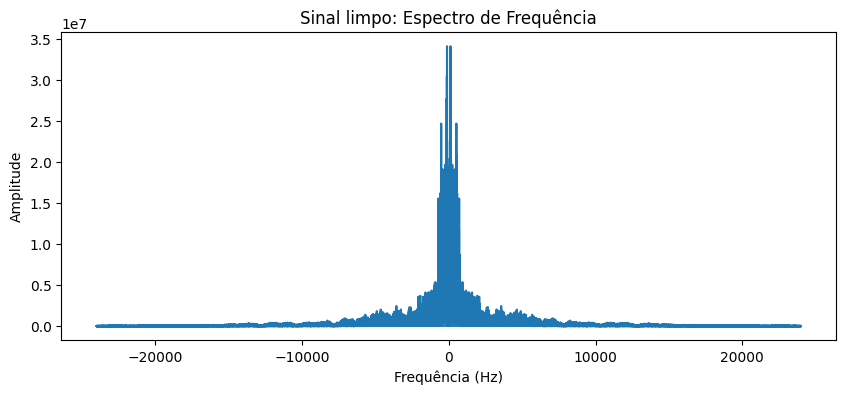

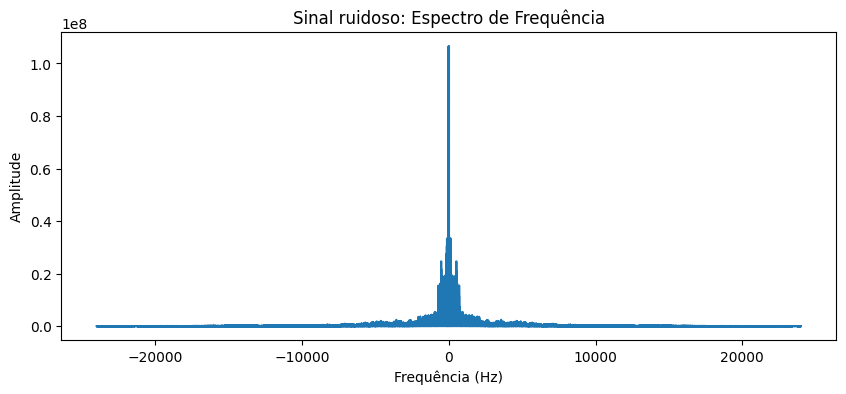

In [76]:
#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal limpo: Espectro de Frequência')
plt.show()

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs_n, Xf_mag_n)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal ruidoso: Espectro de Frequência')
plt.show()

## Beleza, agora vamos tentar restautar o sinal ruidoso enviando ele para um SLIT cujo objetivo seja remover o ruído do sinal!

Existem diversos filtros no domínio da frenquencia:

<img src="figs/filtros.png"  width="600">


### Um filtro comum pra isso é o butterworth. 


Aqui, escolhemos usar o filtro butterworth, poré existe diversos outros filtros para esta tarefa, como:

* Chebychev
* Elliptic
* ...

In [80]:
from scipy.signal import butter, filtfilt

# Function to design lowpass filter coefficients
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Function to apply the filter to the data
def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply the lowpass filter to the data
filtered_data = butter_lowpass_filter(n_signal, 5000, sample_rate, 4)

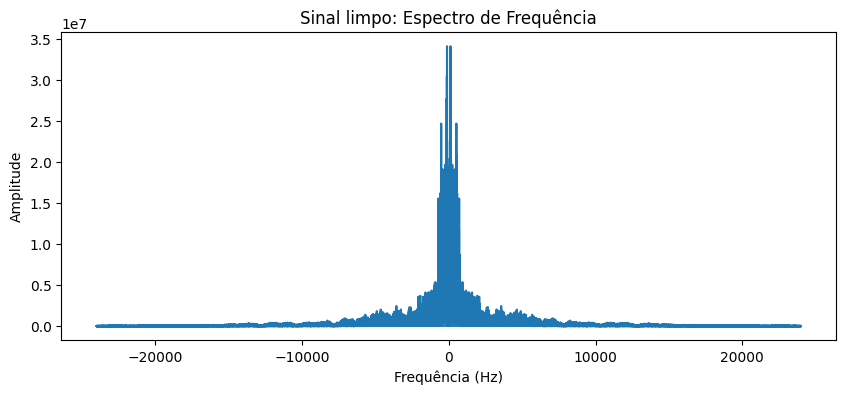

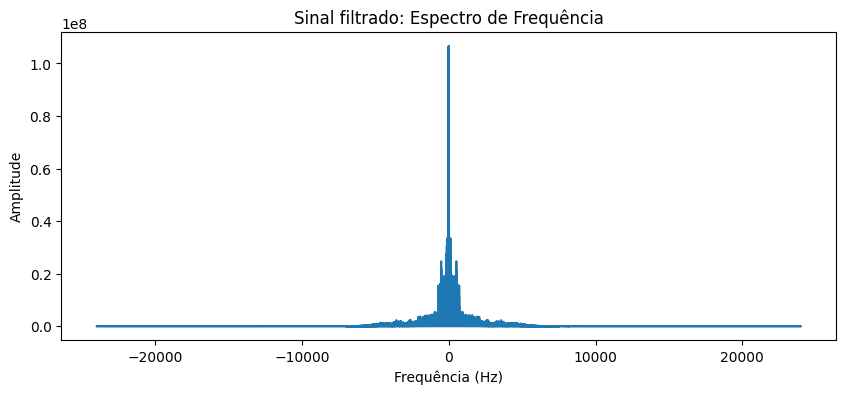

In [81]:
# Calcula a transformada de Fourier
Xf_mag_f = np.abs(np.fft.fft(filtered_data))
freqs_f = np.fft.fftfreq(len(Xf_mag_f), d=1.0/sample_rate)

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal limpo: Espectro de Frequência')
plt.show()

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs_f, Xf_mag_f)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal filtrado: Espectro de Frequência')
plt.show()

In [32]:
Audio(n_signal, rate=sample_rate)

In [42]:
Audio(filtered_data, rate=sample_rate)

In [82]:
from scipy.signal import butter, sosfilt

# lowcut e highcut defino justamente a banda de frequencia que iramos cortar: 
# frequencias abaixo de lowcut e acima de highcut

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

sos = butter_bandpass(400, 12000, sample_rate)
sinal_filtrado = sosfilt(sos, n_signal)


### Após aplicado o filtro, vamos comparar o espectro de frequencia do sinal limpo e o sinal filtrado:

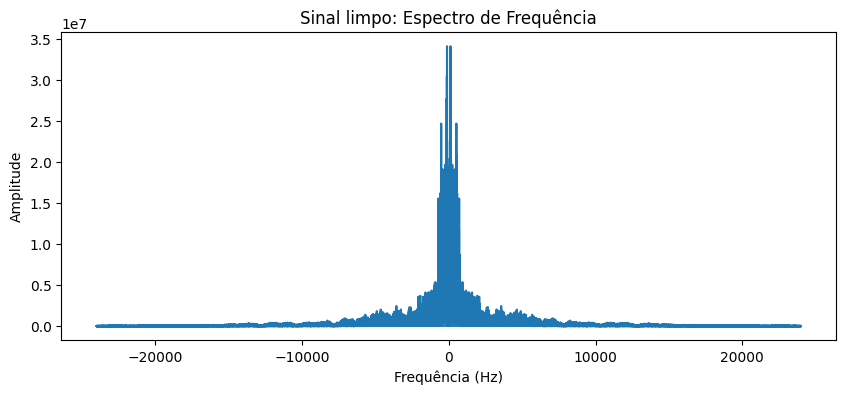

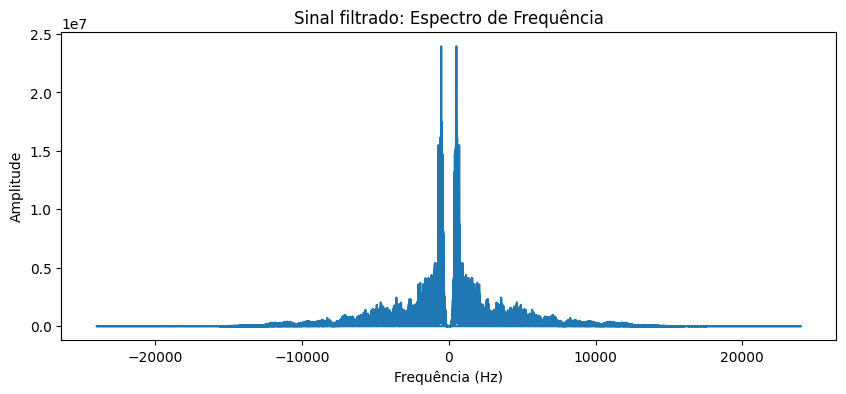

In [83]:
# Calcula a transformada de Fourier
Xf_mag_f = np.abs(np.fft.fft(sinal_filtrado))
freqs_f = np.fft.fftfreq(len(Xf_mag_f), d=1.0/sample_rate)

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal limpo: Espectro de Frequência')
plt.show()

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs_f, Xf_mag_f)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal filtrado: Espectro de Frequência')
plt.show()

###  Também comparar os sinais (limpo, ruidoso e filtrado) no domínio do tempo:

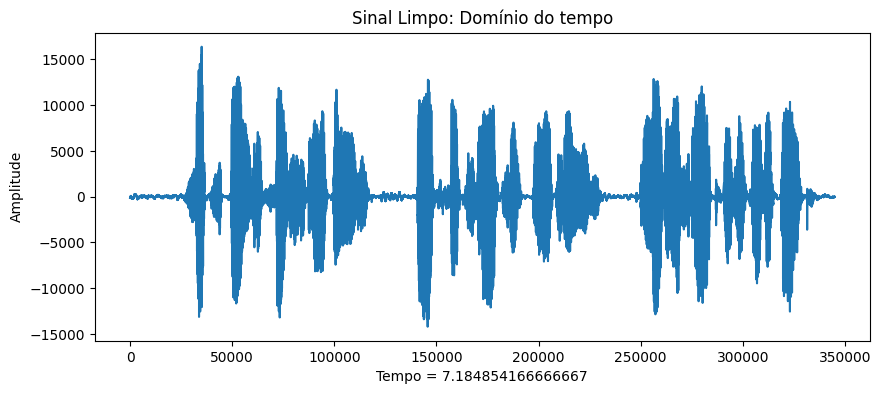

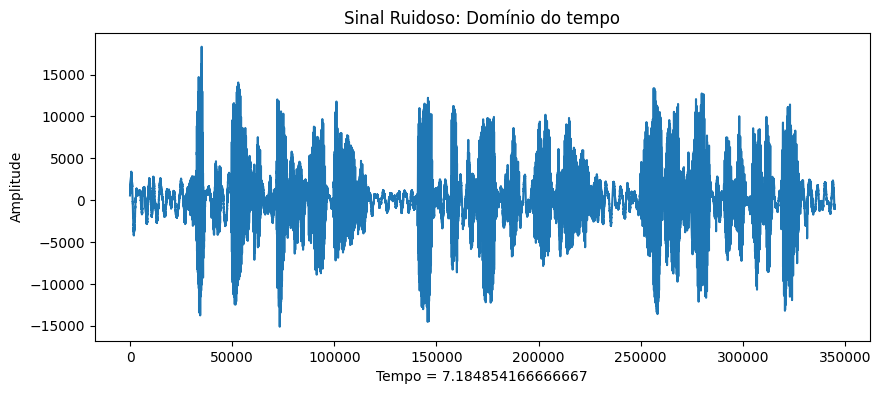

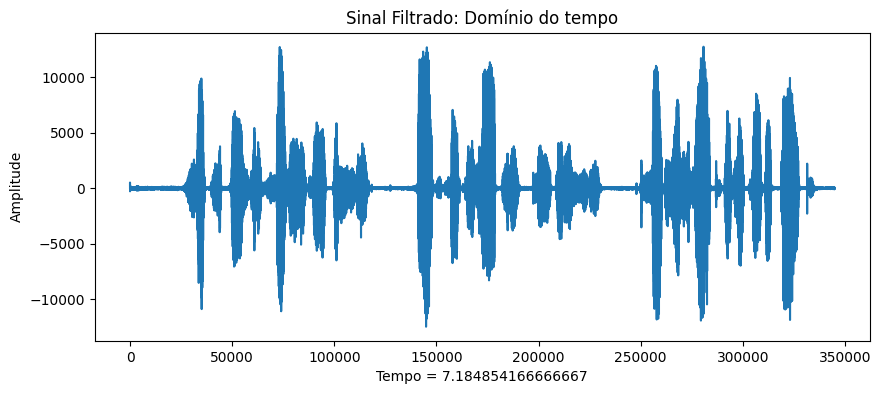

In [84]:
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Limpo: Domínio do tempo')

plt.figure(figsize=(10, 4))
plt.plot(n_signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Ruidoso: Domínio do tempo')

plt.figure(figsize=(10, 4))
plt.plot(sinal_filtrado)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Filtrado: Domínio do tempo')

plt.show()

## E vamos também escutar os tres sinais:

In [85]:
Audio(signal, rate=sample_rate)

In [363]:
Audio(n_signal, rate=sample_rate)

In [64]:
Audio(sinal_filtrado, rate=sample_rate)

### Perceba que nós diminuímos (mas não removemos 100%) o ruído, mas a suavisação foi aplicada em todo o sinal anterando a voz!  Suavizando a voz do interlocutor.

## Vamos  tentar uma alternativa mais sofisticada?

Aqui usamos o pacote do python `noisereduce`. Encontrei esse pacote numa buscar por 
"filter to remove background noise a audio signal python" :p

In [86]:
import noisereduce as nr

# Noise reduction
reduced_noise = nr.reduce_noise(n_signal, sr=sample_rate)

### Visualisando os tres sinais no domínio do tempo:

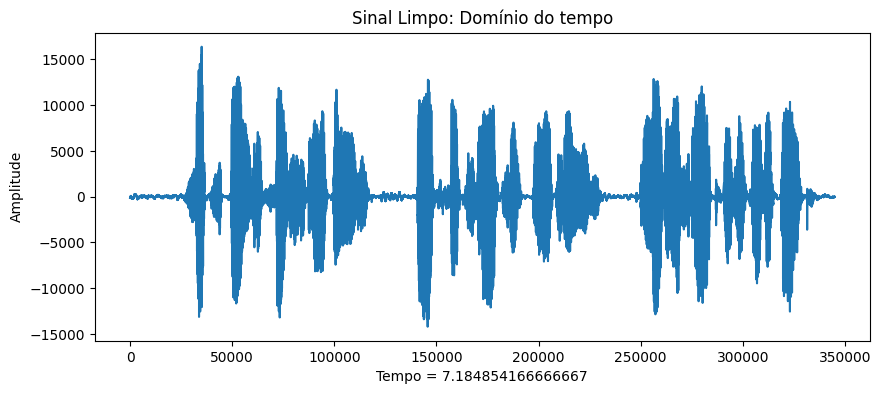

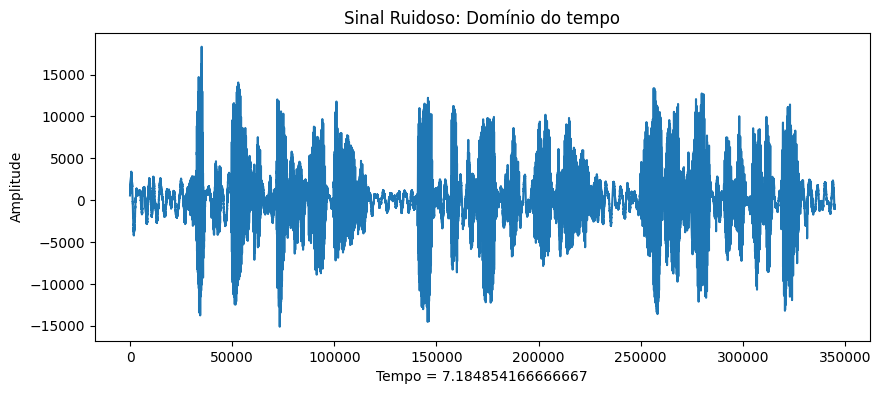

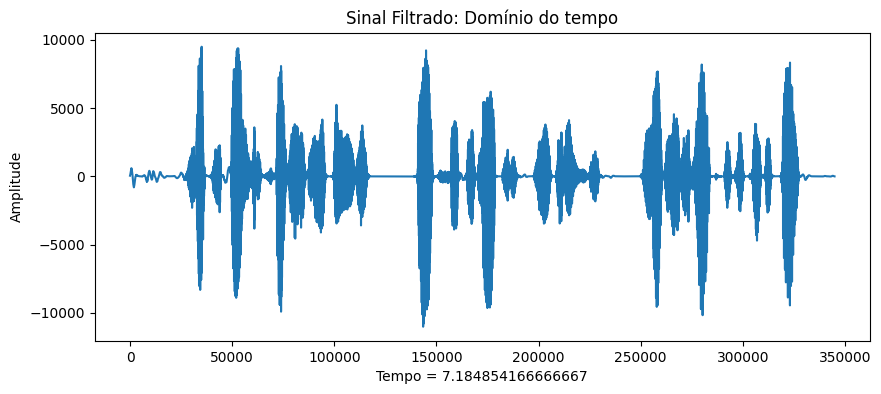

In [87]:
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Limpo: Domínio do tempo')

plt.figure(figsize=(10, 4))
plt.plot(n_signal)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Ruidoso: Domínio do tempo')

plt.figure(figsize=(10, 4))
plt.plot(reduced_noise)
plt.xlabel('Tempo = {}'.format(tempo))
plt.ylabel('Amplitude')
plt.title('Sinal Filtrado: Domínio do tempo')

plt.show()


### Visualizando o sinal limpor e o sinal filtrado atravéz de seus espectros:

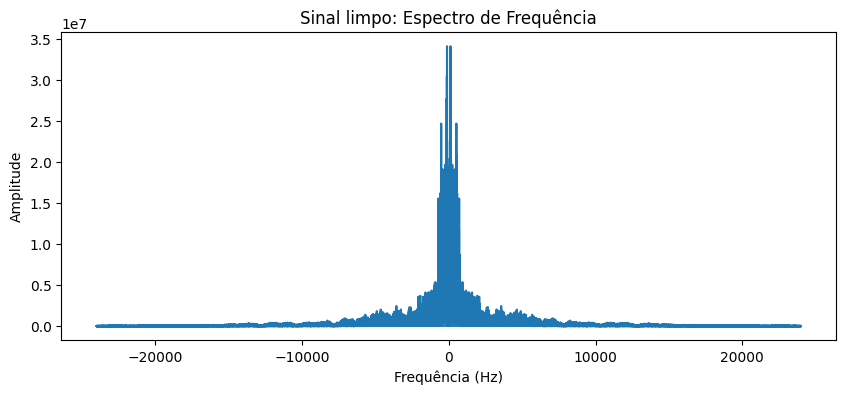

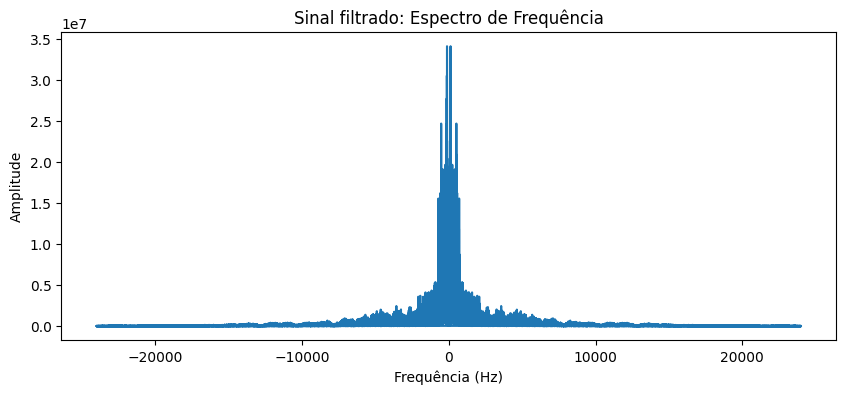

In [88]:
# Calcula a transformada de Fourier
Xf_mag_f1 = np.abs(np.fft.fft(reduced_noise))
freqs_f1 = np.fft.fftfreq(len(Xf_mag_f), d=1.0/sample_rate)

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal limpo: Espectro de Frequência')
plt.show()

#Plot do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(freqs, Xf_mag)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Sinal filtrado: Espectro de Frequência')
plt.show()

## Escutando o audio restaurado por esse processo mais sofisticado:

Esse processo não trata da aplocação de um simples filtro. Modelos de restauração mais complexos foram utilizados! E este tipo de filtragem foge do escopo da nossa disciplina. 

In [366]:
Audio(reduced_noise, rate=sample_rate)

## Sua vez!

Vamos fazer um teste  de filtragem simples em imagens!

### Vamos usar o pacote do python skimage!

In [54]:
from skimage import data, util

### Aqui carregamos uma imagem da própria base de dados da skimage:

DADOS SOBRE A IMAGEM: 

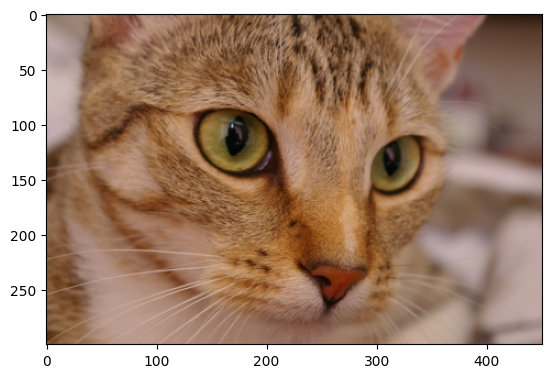

In [89]:
imagem = data.cat()
print("Dados sobre a imagem:".upper(), end=" ")
plt.imshow(imagem)
plt.show()

## Aqui eu vou corromper a imagem com um ruído gaussiano:

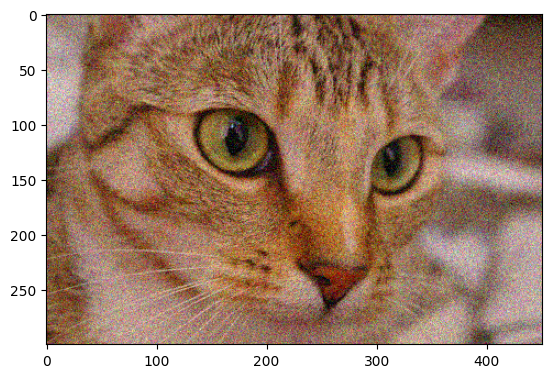

In [90]:
noise_imagem = util.random_noise(imagem, mode='gaussian',)
plt.imshow(noise_imagem)
plt.show()

# Como voce pode filtrar essa imagem a fim de remover este ruído?

Algoritmos classicos afirmam que filtros passa-baixa são bons para esta tarefa!

Dica: use recursos do skimage ou outros pacotes para processamento de imagens! Não reinvente a roda!

In [348]:
from skimage import filters

pass